# Projet : Michelin Guide Restaurants 2021 | Kaggle

## Problèmatique :  Peut-on attribuer une étoile à un restaurant sans y avoir mangé ?

![Michelin](src/icon.png)

### Questions : 
* Peut-on attribuer une étoile à un restaurant sans y avoir mangé ?
* Quel Positionnement Marketing peut prendre un restaurateur pour entrer au Guide Michelin ?

**Dataset :** [Dataset Michelin Guide Restaurants 2021](https://www.kaggle.com/datasets/ngshiheng/michelin-guide-restaurants-2021)

**Reference :** [Site du Guide Michelin](https://guide.michelin.com/en/restaurants)


## Prévisualisation des données.

[Tableau Michelin Guide Restaurants 2021](https://public.tableau.com/app/profile/gauthier6270/viz/MichelinGuideRestaurants2021Kaggle/MichelinGuideRestaurants2021)

### Page 1 :  Emplacements des restaurants 

* La prévisualisation de la carte permet de mettre en évidence que la majorité des restaurants incrits au Guide Michemin se trouve en Europe. Cela va nous permettre de filter nos données sur les devises en Euro et éviter de calculer les taux de changes. 

* En filtrant ces données et en les mettant en valeur par densité, on s'aperçoit qu'il existe des Hotspot sur les côtes, à Paris, Bruxelle et sur la [banane bleu](https://fr.wikipedia.org/wiki/Mégalopole_européenne). 


### Page 2 :  Cuisine en europe et à Paris 

* Après regroupement des sous-catégories de cuisine dans des ensembles antagonistes : 
    * Classique / Contemporaine 
    * Internationnal / Régionale 
    * Produit de la mer / Grill / Végétarien / Saisonnier 
    
Nous obtenons une carte mettant en valeur les cuisines : Classique, Contemporaine et Régionale. Avec une prévalence des cuisines Classique et Contemporaine dans l'ensemble des térritoires. 

On peut noter des répartitions diffèrentes avec une remonté de la cuisine régionale en Italie, Allemagne et Belgique en concordance avec notre bassin de population. En revance à Paris, nous obtenons une prévalence de Cuisine Contemporaine et créative. 

### Page 3 :  Classement Michelin en fonction de la cuisine et du territoire. 

En comparant les types de cuisines avec le nombre d'étoiles au Michelin, nous nous rendons compte :

* Que la cuisine internationnale n'a jamais obtenu 3 étoiles. 

* Que la cuisine Grill, Végétarienne et Saisonnière n'a jamais obtenu plus d'une seule étoile. 

Sur la carte nous voyons qu'au delà d'une répartition homogène des étoiles sur le territoire Européen, la majorité des "3 étoiles" du Guide se trouve dans le sud est de la France et dans le nord de l'Italie.

### Page 4 : Classement Michelin en fonction de la cuisine. 

La répartition des étoiles (toutes catégories confondues) viennent mettre en lumière les restaurants ayant une cuisine contemporaine et originale. 

On peut noter une volonté du guide à mettre en valeur la cuisine régionale en lui attribuant davantage de Bib Gourmand venant la faire passer devant la cuisine classique (il peut s'agir d'une bonne piste pour un nouveau restaurateur qui souhaiterait s'introduire dans le classement). 

### Page 5 : Classement Michelin en fonction du prix du menu. 

En analysant nos colonnes des prix, MinPrice(menu moyen le plus économique) et MaxPrice(menu moyen le plus chère), on obtients des fourchettes de prix bien découpé entre Bid Gourmand, 1, 2 et 3 étoiles. 

On peut observer que la moyennes de ces deux colonnes permettent de voir des prix croissant entre les différentes étoiles attribué. 
* Un nouvel entant par la catégorie Bib Gourmant pourra fixer ses prix grace à cette estimation de prix.
* les classés pourrons augmenter en gamme en remplaçant de leur carte les menu plus économiques.

# Appliquez un modèle d'apprentissage automatique

In [2]:
# Imports
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

import sklearn.linear_model as sk

import seaborn as sns

import matplotlib.pyplot as plt

# Import & visualize dataset

df = pd.read_csv("src/michelin_my_maps.csv")
df.head()

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225,225,EUR,"Creative, Modern Cuisine",10.789999,52.433172,4.953616e+11,https://guide.michelin.com/en/niedersachsen/wo...,http://www.restaurant-aqua.com,3 MICHELIN Stars
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230,230,EUR,Creative,10.002980,53.542623,4.940229e+11,https://guide.michelin.com/en/hamburg-region/h...,http://www.the-table-hamburg.de/,3 MICHELIN Stars
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259,319,EUR,Creative,11.758229,47.696685,4.980227e+09,https://guide.michelin.com/en/bayern/rottach-e...,http://www.althoffcollection.com,3 MICHELIN Stars
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany",Perl,205,295,EUR,Creative,6.387211,49.535173,4.968668e+10,https://guide.michelin.com/en/saarland/perl/re...,https://www.victors-fine-dining.de/,3 MICHELIN Stars
4,Rutz,"Chausseestraße 8, Berlin, 10115, Germany",Berlin,198,245,EUR,"Modern Cuisine, Creative",13.386087,52.528351,4.930246e+11,https://guide.michelin.com/en/berlin-region/be...,https://www.rutz-restaurant.de/,3 MICHELIN Stars


### Types de données

* _0 : Name = ✏️ Qualitative Data : Nominal
* _1 : Adresse = ✏️ Qualitative Data : Nominal
* _2 : Location = ✏️ Qualitative Data : Nominal
* _3 : MinPrice = 🔢 Quantitative Data : Discrete
* _4 : MaxPrice = 🔢 Quantitative Data : Discrete
* _5 : Currency = ✏️ Qualitative Data : Nominal
* _6 : Cuisine = ✏️ Qualitative Data : Nominal
* _7 : Longitude = 🔢 Quantitative Data : ♾ Continuous
* _8 : Latitude = 🔢 Quantitative Data : ♾ Continuous
* _9 : PhoneNumber = 🔢 Quantitative Data : Discrete
* 10 : Url = ✏️ Qualitative Data : Nominal
* 11 : WebsiteUrl = ✏️ Qualitative Data : Nominal
* 12 : Award = ✏️ Qualitative Data : 💯 Ordinal

In [2]:
# Correction d'erreur sur les colonnes :

df.dtypes # Affichage infos Types

# Correction "," -> "" pour les 1000
##
cl_To_Replace = ["MinPrice", "MaxPrice"]
df[cl_To_Replace] = df[cl_To_Replace].replace(to_replace=",", value= "", regex = True)

# Supression des lignes vides
##
df.dropna(subset = ["MinPrice", "MaxPrice"], inplace=True)

# Correction Type txt -> int
##
df["MinPrice"] = df["MinPrice"].astype(int)
df["MaxPrice"] = df["MaxPrice"].astype(int)

df.isnull().any() # Recherche de ligne vides

df.describe(include="all")

df.isnull().any()

Name           False
Address        False
Location       False
MinPrice       False
MaxPrice       False
Currency       False
Cuisine        False
Longitude      False
Latitude       False
PhoneNumber     True
Url            False
WebsiteUrl      True
Award          False
dtype: bool

### Échantillonnage 

Ce jeu de données correspond à l'ensemble des restaurant du guide michelin, mais par comodité nous allons nous concentrer sur les restaurants utilisant une devise en € et écarter les autres données pour éviter de réaliser des opérations de taux de change.

In [3]:
# Taille du dataSet 
##
initial_size = df.shape
initial_number_of_row = len(df)


# Calcul de la marge d'erreur
##
Z_Score = 1.96 
Sigma = df.std()
n = len(df)

E = Z_Score * Sigma / np.sqrt(n) ## Marge d'erreur 


# Calcul d'une Taille minimale viable pour un échantillon
##
s = df.std()# Sample Standard = ecart Type de l'échantillon 
t = Z_Score ## Z_Score, noté t ou Z.

n_minimun = ( t * s / E)**2 ## taille de l'échantillon 



print("Taille du dataset initiale: ", initial_size, "\n")

print("Nombre de ligne dans le dataset : ",  initial_number_of_row, "\n")

print("Marge d'erreur THÉORIQUE : ", E["MaxPrice"] ,"\n")

# Reduction de notre dataSet à la devise EUR. 
##
df = df.query("Currency == 'EUR'")


# Calcul de la marge d'erreur
##
Z_Score = 1.96 
Sigma = df.std()
n = len(df)

E = Z_Score * Sigma / np.sqrt(n) ## Marge d'erreur 


# Calcul d'une Taille minimale viable pour un échantillon
##
s = df.std()# Sample Standard = ecart Type de l'échantillon 
t = Z_Score ## Z_Score, noté t ou Z.

n_minimun = ( t * s / E)**2 ## taille de l'échantillon 

print("Nombre de ligne euro du dataset : ", len(df), "\n")

print("Marge d'erreur THÉORIQUE : ", E["MaxPrice"] ,"\n")

print("Sans retirer ces valeurs, notre Marge d'erreur sur les prix serait de 400,",  
      "ce qui serait faussé par rapport à notre nouveau jeu de donnée tronqué",
      "donc notre marge d'erreur actuel qui se situe à 2 €")

Taille du dataset initiale:  (6501, 13) 

Nombre de ligne dans le dataset :  6501 

Marge d'erreur THÉORIQUE :  440.1082957388672 

Nombre de ligne euro du dataset :  3535 

Marge d'erreur THÉORIQUE :  2.104615760244914 

Sans retirer ces valeurs, notre Marge d'erreur sur les prix serait de 400, ce qui serait faussé par rapport à notre nouveau jeu de donnée tronqué donc notre marge d'erreur actuel qui se situe à 2 €


### EDA

In [4]:
# Supprime les colonnes inutiles :
##
df = df.drop(columns=["Name", "Address","Location", "Currency" , "Longitude", "Latitude", "PhoneNumber", "Url", "WebsiteUrl"])

# df.columns # "Cuisine", "MinPrice", "MaxPrice", "Award"

df.head()

,MinPrice,MaxPrice,Cuisine,Award
0,225,225,"Creative, Modern Cuisine",3 MICHELIN Stars
1,230,230,Creative,3 MICHELIN Stars
2,259,319,Creative,3 MICHELIN Stars
3,205,295,Creative,3 MICHELIN Stars
4,198,245,"Modern Cuisine, Creative",3 MICHELIN Stars


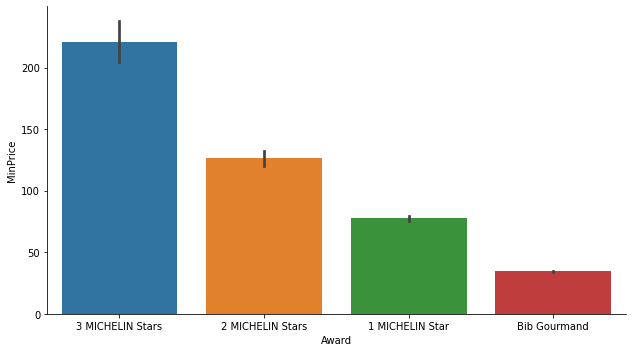

In [5]:
sns.catplot(x="Award", y="MinPrice",data=df, kind="bar", aspect=16/9)

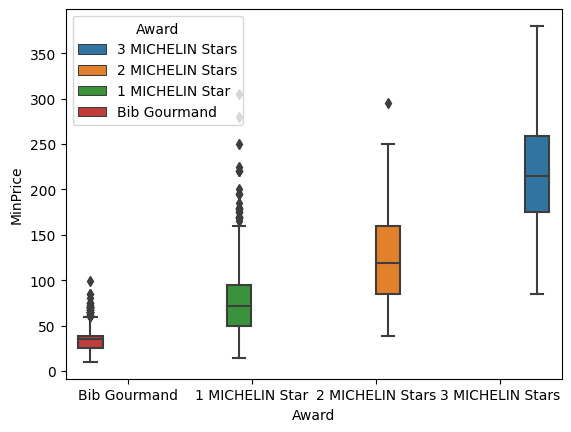

In [6]:
sns.boxplot(x="Award", y="MinPrice", hue="Award", data=df).invert_xaxis()

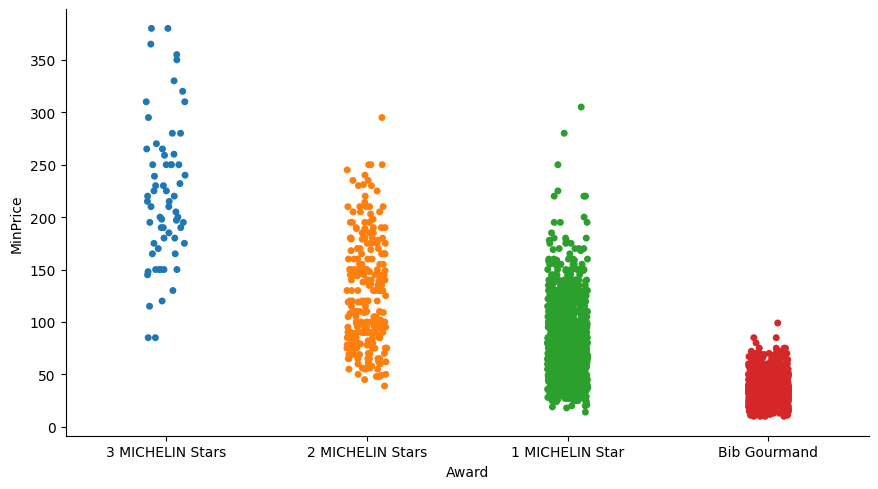

In [7]:
sns.catplot(x="Award", y="MinPrice", hue="Award", data=df, aspect=16/9)

### Preprocessing

In [8]:
df.head()
df["Cuisine"].unique()


array(['Creative, Modern Cuisine', 'Creative', 'Modern Cuisine, Creative',
       'Classic French', 'Classic French, Creative',
       'Modern French, Creative', 'Creative, Contemporary',
       'Creative, Innovative', 'Modern Cuisine',
       'Creative, Traditional Cuisine', 'Modern Cuisine, Italian',
       'Modern Cuisine, Contemporary', 'Creative, Alpine',
       'Creative, Seafood', 'Mediterranean Cuisine, Modern Cuisine',
       'Classic Cuisine', 'Creative, Regional Cuisine', 'Seafood',
       'Modern Cuisine, Classic Cuisine',
       'Modern Cuisine, Japanese Contemporary',
       'Creative, Country cooking', 'Creative, Classic Cuisine',
       'Classic French, Classic Cuisine',
       'Creative French, Classic Cuisine', 'Creative, Classic French',
       'Modern Cuisine, International', 'Asian, Creative',
       'Creative, French Contemporary', 'Mediterranean Cuisine, Creative',
       'Creative, Market Cuisine', 'Modern Cuisine, Classic French',
       'Classic Cuisine, Medit

In [9]:
# Regroupement en categorie dans Cuisine :

# Classique
# Contemporain et Créative
# International
# Régional
# Produits de la mer
# Grill
# Végétarien
# Saisonnier

Classique_list = ['Classic', 'Home', 'Traditional', 'French', 'Belgian']

Contemporaine_et_Creative_list = ['Contemporary', 'Creative', 'Fusion', 
                                  'Innovative','Modern']

International_list = ['Asian', 'Austrian','Chinese', 'Chinesse', 'Colombian', 
                      'Indian', 'Indonesian', 'International', 'Israeli', 
                      'Japanese', 'Korean', 'Latin', 'Lebanese',
                      'Mexican', 'Eastern', 'Peruvian', 'Rice', 
                      'Thai', 'Vietnamese', 'World']

Regional_list = ['Alpine', 'Alsatian', 'Andalusian', 'Apulian', 
                 'Basque', 'Bavarian', 'Breton', 
                 'Calabian', 'Calabrian', 'Campanian', 'Catalan', 'Corsican', 'Country',
                 'from', 'Emilian', 'Galician', 'German','Greek', 
                 'Irish', 'Italian', 'Ligurian', 'Lombardian', 'Lombardian'
                 'Mediterranean','Mediterranean', 
                 'Piedmontese', 'Portuguese', 'Provençal', 'Regional', 
                 'Sardinian', 'Savoyard', 'Sharing', 'Sicilian', 'Spanish', 
                 'Tuscan', 'Umbrian', 'Venetian']

Produits_de_la_mer_list = ['Seafood']

Grill_list = ['Grill']

Vegetarien_list = ['Organic', 'Vegan', 'Vegetarian']

Saisonnier_list = ['Seasonal', 'Marker', 'Market']

for i in df.index:
    name = df.loc[i,"Cuisine"]
    
    for keyword in Saisonnier_list:
        if keyword in name:
            df.loc[i,"Cuisine"]='Saisonnier'

    for keyword in Vegetarien_list:
        if keyword in name:
            df.loc[i,"Cuisine"]='Végétarien'
    
    for keyword in Grill_list:
        if keyword in name:
            df.loc[i,"Cuisine"]='Grills'

    for keyword in Produits_de_la_mer_list:
        if keyword in name:
            df.loc[i,"Cuisine"]='Produits de la mer'
            
    for keyword in Regional_list:
        if keyword in name:
            df.loc[i,"Cuisine"]='Régional'

    for keyword in International_list:
        if keyword in name:
            df.loc[i,"Cuisine"]='International'
            
    for keyword in Contemporaine_et_Creative_list:
        if keyword in name:
            df.loc[i,"Cuisine"]='Contemporaine et Créative'

    for keyword in Classique_list:
        if keyword in name:
            df.loc[i,"Cuisine"]='Classique'

In [10]:
print( df["Cuisine"].value_counts() )

# Classique
# Contemporain et Créative
# International
# Régional
# Produits de la mer
# Grills
# Végétarien
# Saisonnier

Contemporaine et Créative    1881
Classique                     850
Régional                      510
International                 152
Saisonnier                     65
Produits de la mer             59
Végétarien                     12
Grills                          6
Name: Cuisine, dtype: int64


In [11]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list = df.columns[:-1]

X = df.loc[:,features_list] # We add feature_list into our loc 
y = df.loc[:,"Award"] # We set "Profit" as the target variable

print("...Done.", "\n")

Separating target variable from features...
...Done. 



In [12]:
# Divide dataset Train set & Test set 
print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print("...Done.")

Splitting dataset into train set and test set...
...Done.


In [13]:
# Le dataset à déja été clean. 
X_train.isnull().any()

MinPrice    False
MaxPrice    False
Cuisine     False
dtype: bool

In [14]:
# Encoding categorical features and standardizing numeric features
print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables

# This is a list comprehension (too complex for students)
#numeric_features = [i  for i,item in enumerate(X_train.columns) if item != "Sex" and item !="Embarked" ]

numeric_features = [0, 1] 
numeric_transformer = StandardScaler()


categorical_features = [2] 
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

#### X_train BEFORE preprocessing ####
      MinPrice  MaxPrice                    Cuisine
2842        64       255  Contemporaine et Créative
608         95       120              International
1844        90       140  Contemporaine et Créative
1356        70        78  Contemporaine et Créative
5660        28        69  Contemporaine et Créative

Encoding categorical features and standardizing numerical features...
...Done.
#### X_train AFTER preprocessing ####
[[ 0.          1.          0.          0.          0.          0.
   0.          0.          0.01635916  2.38570443]
 [ 0.          0.          0.          1.          0.          0.
   0.          0.          0.69962479  0.24626677]
 [ 0.          1.          0.          0.          0.          0.
   0.          0.          0.58942065  0.5632205 ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0.          0.14860412 -0.41933606]
 [ 0.          1.          0.          0.          0.          

In [15]:
print(y_train.head())

2842    1 MICHELIN Star
608     1 MICHELIN Star
1844    1 MICHELIN Star
1356    1 MICHELIN Star
5660       Bib Gourmand
Name: Award, dtype: object


### Build your model

In [16]:
# Train model
print("Train model...")
classifier = sk.LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


In [17]:
## Testing pipeline ###
print("--- Testing pipeline ---")

# Copy X_train to avoid caveats
X_test = X_test.copy()

# Imputing 
#print("Imputing missing values")
#X_test[["Age"]] = numerical_imputer.transform(X_test[["Age"]])
#X_test[["Embarked"]] = categorical_imputer.transform(X_test[["Embarked"]])
#print()

# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test = feature_encoder.transform(X_test)

print("...Done.")
print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()

# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()

print("Final accuracy score on Test set: ",classifier.score(X_test, y_test))

--- Testing pipeline ---
Standardizing numerical features...
      MinPrice  MaxPrice                    Cuisine
2423        55       161  Contemporaine et Créative
6297        39        65  Contemporaine et Créative
4568        18        50                   Régional
6165        29        42  Contemporaine et Créative
2821        60       190  Contemporaine et Créative
...        ...       ...                        ...
4690        80        80              International
1745       120       180  Contemporaine et Créative
5649        33        33  Contemporaine et Créative
2900        49       160  Contemporaine et Créative
268        165       189  Contemporaine et Créative

[707 rows x 3 columns]

...Done.
[[ 0.          1.          0.          0.          0.          0.
   0.          0.         -0.18200828  0.89602191]
 [ 0.          1.          0.          0.          0.          0.
   0.          0.         -0.53466151 -0.62535598]
 [ 0.          0.          0.          0.      

In [18]:
print("Train score: ", classifier.score(X_train, y_train))
print("Test score: ", classifier.score(X_test, y_test))

Train score:  0.887906647807638
Test score:  0.884016973125884


### D'après de ce modèle : 

En utilisant comme données :
* Les prix moyen du menu d'entrée de gamme 
* Les prix moyen du menu Haut de gamme 
* Et le type de cuisine servi par restaurant 

Nous pouvons estimer avec une fiabilité de près de 90 % l'étoile accordé à ce restaurant.

--- Assessment of performances ---


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


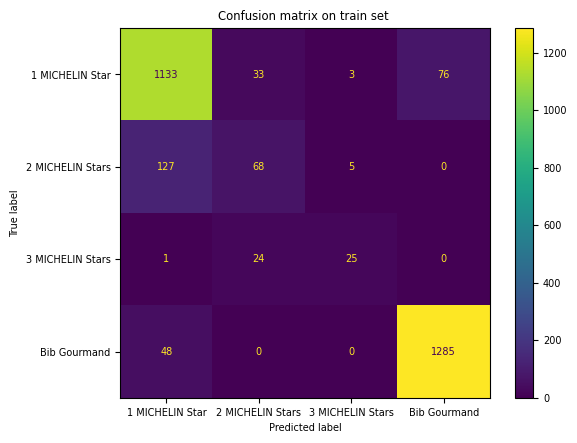

accuracy-score on train set :  0.887906647807638


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


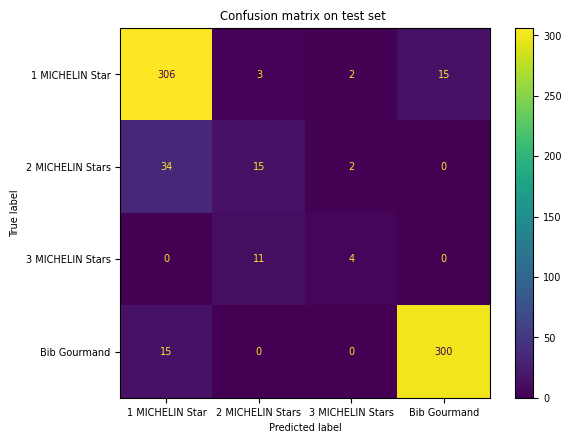

accuracy-score on test set :  0.884016973125884


In [19]:
### Assessment of performances ###
print("--- Assessment of performances ---")

plt.rcParams.update({'font.size': 7})

# Plot confusion matrix
cm = plot_confusion_matrix(classifier, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = plot_confusion_matrix(classifier, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

Les deux Matrices de Confusions présente des résultats similaire. 
L'accuracy-score est extrèmement proche pour le dataset d'entrainement comme pour le dataset test. 
On peut donc en conclure que se baser sur ces paramètre nous permettent d'avoir une estimation juste.

En analysant de près nos résultat :

* Big Gourmant peut dans de rare cas etre confondu avec une première étoile 
* ⭐ Peut etre confondu avec 2 étoiles et parfoit avec des Big Gourmant 
* ⭐⭐ Peut etre confondu avec 1 étoile et dans de rare cas avec 3 étoiles
* ⭐⭐⭐ Est souvant confondu avec 2 étoiles voire 1 au Guide ( Dù au trop petit échantillon de donnée ) 

Nous pouvons réaliser des estimations extrèmement fiable sur nos premières catégories, là où nous parlons d'entrée au Guide Michelin mais nos estimations sont plus flou pour les restaurants Haut de Gamme.

In [20]:
# Check coefficients 

print("coefficients are: ", classifier.coef_) 
print("Constant is: ", classifier.intercept_)
print()

# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)
print()

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])
print()

# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_

# CAREFUL HERE, we have a list of two arrays. We can use list comprehensions OR np.append() 
# General complex method
flat_cat_features = [item for array in categorical_column_names for item in array]


print("Categorical columns are: ", flat_cat_features, "\n")

# Print numerical columns
numerical_column_names = X.iloc[:, numeric_features].columns 
print("numerical columns are: ", numerical_column_names, "\n")

# Append all columns 
all_column_names = np.append(flat_cat_features, numerical_column_names)
print("All column names are: ",all_column_names, "\n")

coefficients are:  [[-1.38617962e-01  2.86500959e-01 -2.42632468e-01  2.48200391e-01
   1.77990168e-01 -4.86564497e-02 -3.57146758e-01  6.38807167e-02
   4.36460576e-01  4.40955137e-01]
 [ 5.16114888e-01  1.03829060e+00 -1.56592377e-03 -8.54253303e-01
  -1.32542600e-01 -2.96955907e-01 -1.49420826e-01 -1.10440836e-01
   8.35394202e-01  2.16607517e+00]
 [-6.21666985e-02  4.56288765e-01  2.33402720e-06 -8.13916951e-01
   5.31434713e-01 -1.02786301e-01 -2.35761317e-03 -3.65069662e-03
   1.63641094e+00  2.95286345e+00]
 [-3.15330228e-01 -1.78108032e+00  2.44196058e-01  1.41996986e+00
  -5.76882281e-01  4.48398658e-01  5.08925198e-01  5.02108156e-02
  -2.90826572e+00 -5.55989375e+00]]
Constant is:  [ 3.85304221 -0.51877852 -5.11418891  1.77992522]

All transformers are:  [('cat', OneHotEncoder(), [2]), ('num', StandardScaler(), [0, 1])]

One Hot Encoder transformer is:  OneHotEncoder()

Categorical columns are:  ['Classique', 'Contemporaine et Créative', 'Grills', 'International', 'Produits 

In [21]:
all_column_names

array(['Classique', 'Contemporaine et Créative', 'Grills',
       'International', 'Produits de la mer', 'Régional', 'Saisonnier',
       'Végétarien', 'MinPrice', 'MaxPrice'], dtype=object)

In [22]:
classifier.coef_.mean(axis=0)

array([ 1.80411242e-16,  7.21644966e-16, -1.24900090e-16,  6.66133815e-16,
        1.11022302e-16,  2.35922393e-16,  6.38378239e-16,  1.30104261e-16,
       -8.88178420e-16, -3.77475828e-15])

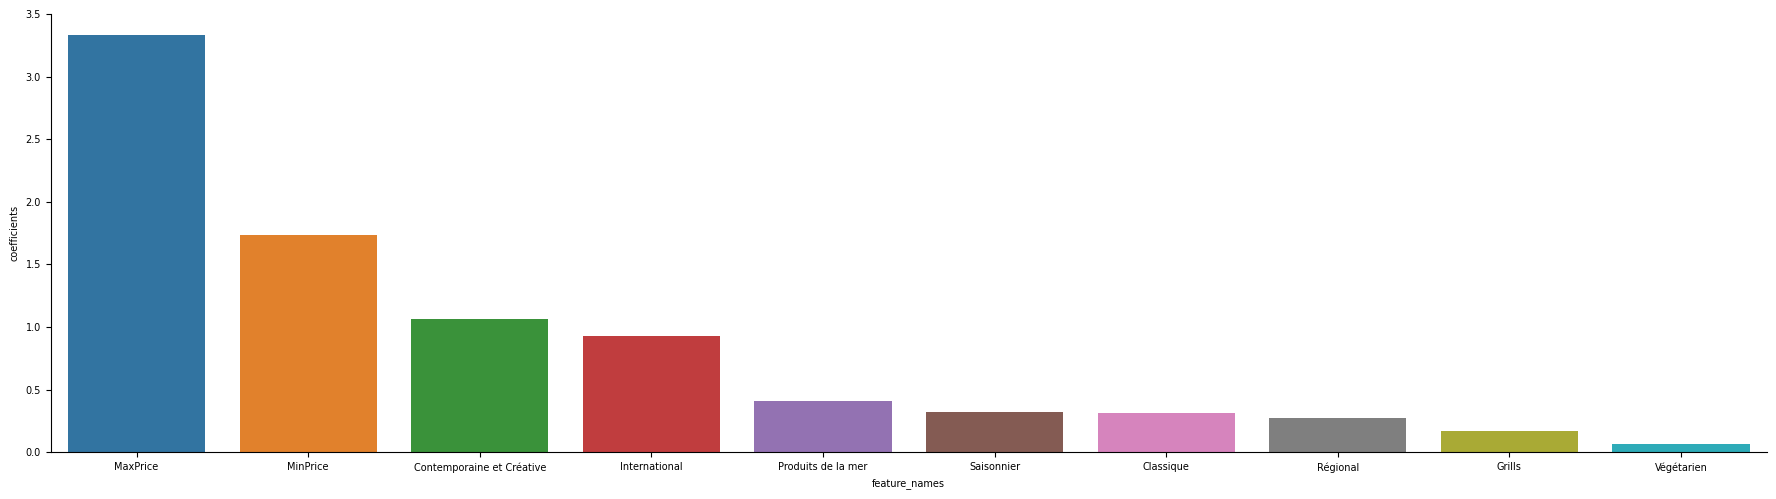

In [23]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":classifier.coef_.std(axis=0) # CAREFUL HERE. We need to access first index of our list because 
                                            # Data need to be 1 dimensional
                                            # That's what .squeeze()
})


# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=32/9) # Resize graph

On s'aperçois que le menu le plus chère de la carte est déterminant pour determiner le nombre d'étoile.

<ipython-input-24-864e72ea27ac>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['feature_names'][3] = "MeanPrice"


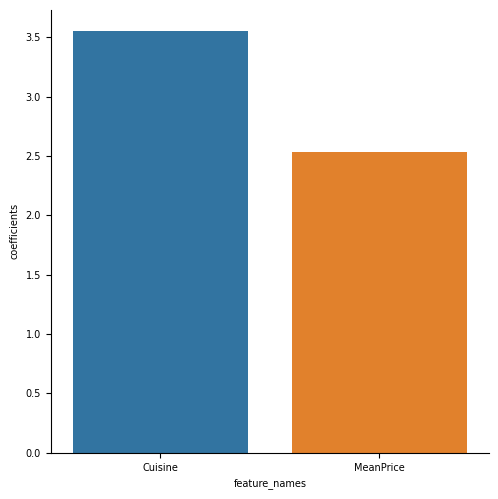

In [24]:
cuisine = feature_importance[0:8].sum()
cuisine[0] = "Cuisine"

mean = feature_importance[8:10].mean()

new = feature_importance.drop(range(0, 8))

new = new.append(cuisine, ignore_index=True)
new = new.append(mean, ignore_index=True)
new = new.drop(range(0, 2))
new['feature_names'][3] = "MeanPrice"

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=new.sort_values(by="coefficients", ascending=False), 
            kind="bar")

Mais en regroupant nos cuisine, on s'aperçoit que toute categories confondu, la cuisine servie dans un restaurant impacte plus l'attribution d'étoile que le prix moyen d'un menu.